# Team 02
# 5.1 Exploratory Data Analysis



We import the libraries that we will use for the Exploratory Data Analysis (EDA).

In [1]:
import pandas as pd
import numpy as np
#matplotlib 3.4 version is needed
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
from imageio import imread
from pprint import pprint 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.style.use("ggplot")

* We read the files.

In [2]:
df = pd.read_csv('listings.csv')
reviews1_data = pd.read_csv('reviews1.csv')
reviews2_data = pd.read_csv('reviews2.csv')
reviews3_data = pd.read_csv('reviews3.csv')
reviews4_data = pd.read_csv('reviews4.csv')

### 1. How many samples and features does each column file have?

In [12]:
print("The listings data set has {} samples and {} features.".format(
   df.shape[0],df.shape[1]))
print("The reviews1 data set has {} samples and {} features.".format(
   reviews1_data.shape[0],reviews1_data.shape[1]))
print("The reviews2 data set has {} samples and {} features.".format(
   reviews2_data.shape[0],reviews2_data.shape[1]))
print("The reviews3 data set has {} samples and {} features.".format(
   reviews3_data.shape[0],reviews3_data.shape[1]))
print("The reviews4 data set has {} samples and {} features.".format(
   reviews4_data.shape[0],reviews4_data.shape[1]))

The listings data set has 9582 samples and 67 features.
The reviews1 data set has 100000 samples and 6 features.
The reviews2 data set has 100000 samples and 6 features.
The reviews3 data set has 100000 samples and 6 features.
The reviews4 data set has 106607 samples and 6 features.


### 2. What are the types of your features?

In [3]:
pd.set_option('max_rows', 68)
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

### 3. Are there any missing values? If yes, how many and how many rows are affected?

In [15]:
print(
"{} cells have missing values.\n{} rows are affected from missing values.".format(
    df.isna().sum().sum(),df[df.isna().any(axis=1)].shape[0]))

56123 cells have missing values.
9582 rows are affected from missing values.


### 4. How many listings per neighborhood are there?

In [16]:
df.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False)

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1866
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  841
ΝΕΟΣ ΚΟΣΜΟΣ                          713
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             699
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     599
ΠΑΓΚΡΑΤΙ                             383
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      381
ΚΟΛΩΝΑΚΙ                             330
ΑΜΠΕΛΟΚΗΠΟΙ                          329
ΑΚΡΟΠΟΛΗ                             319
ΘΗΣΕΙΟ                               294
ΚΕΡΑΜΕΙΚΟΣ                           244
ΣΤΑΔΙΟ                               223
ΠΕΤΡΑΛΩΝΑ                            214
ΚΥΨΕΛΗ                               201
ΙΛΙΣΙΑ                               172
ΓΟΥΔΙ                                162
ΖΑΠΠΕΙΟ                              141
ΠΑΤΗΣΙΑ                              117
ΛΥΚΑΒΗΤΤΟΣ                           117
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     116
ΝΙΡΒΑΝΑ                              105
ΓΚΥΖΗ                                 88
ΚΟΛΩΝΟΣ                           

* We can also visualize our results.

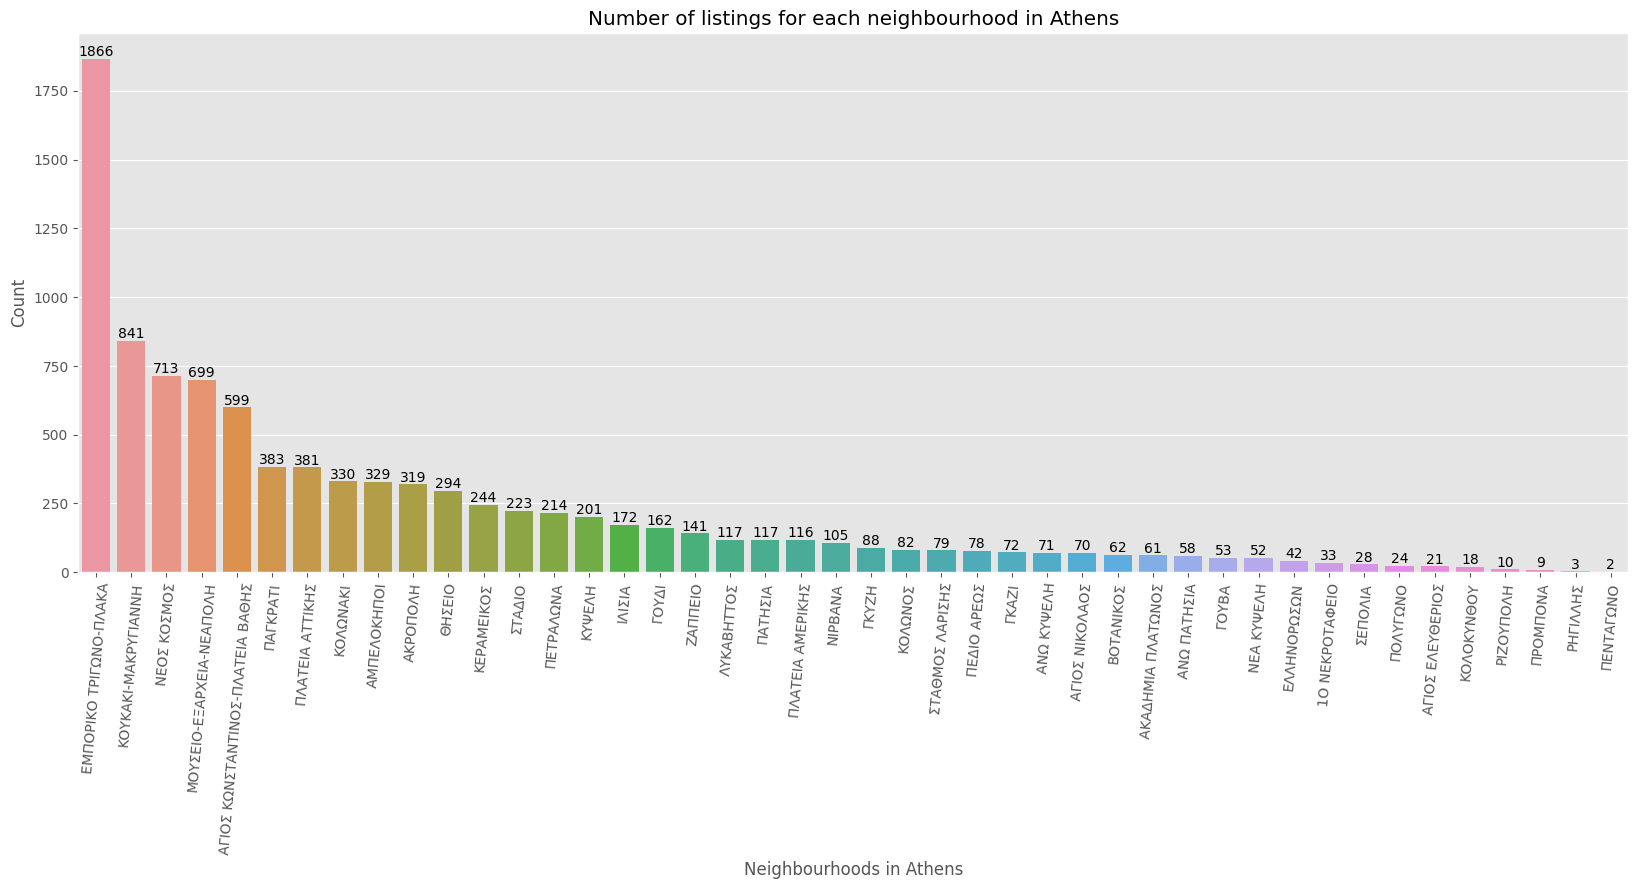

In [17]:
f, ax = plt.subplots(1,1,figsize=(20,7))
ax = sns.countplot(x="neighbourhood_cleansed", 
  order = df['neighbourhood_cleansed'].value_counts().index,
  data=df)
for container in ax.containers:  #we must have matplotlib 3.4  to run the ax.bar_label() function
     ax.bar_label(container)
ax.set_title("Number of listings for each neighbourhood in Athens")
plt.xlabel("Neighbourhoods in Athens")
plt.ylabel("Count")
plt.xticks(rotation=85)
plt.show()

### 5. How many listings per room type are there?



In [4]:
for ind, val in df["room_type"].dropna().value_counts().iteritems():
    print("There are {} listings in room type {}.".format(val, ind))

There are 8463 listings in room type Entire home/apt.
There are 891 listings in room type Private room.
There are 138 listings in room type Hotel room.
There are 90 listings in room type Shared room.


We can visualize our results.

Text(0, 0.5, 'Count')

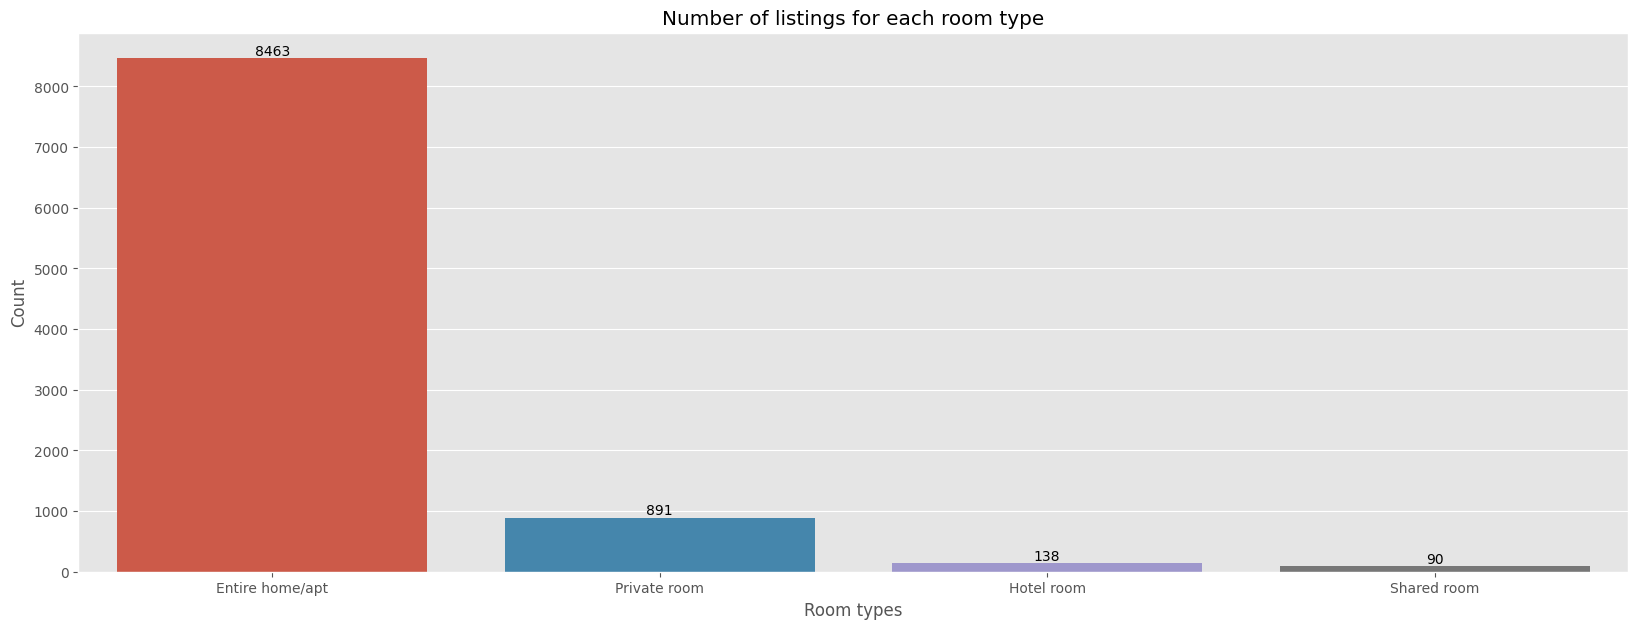

In [19]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x="room_type", 
  order = df['room_type'].value_counts().index,
  data=df)
for container in ax.containers:
     ax.bar_label(container)
ax.set_title("Number of listings for each room type")
plt.xlabel("Room types")
plt.ylabel("Count")

### 6. How many listings per room number are there?

In [6]:
def clean_rows(row):
    row = row.lower().strip("[")
    row = row.strip("]")
    row = row.split(',')
    return row

In [7]:
# Creating a new DF 
df_new = df[['bedrooms','bathrooms_text','amenities']]

# Drop missing
df_new = df_new.dropna().reset_index(drop = True)

# Create 'list_kitchen', as if kitchen in amenities -> 1, else -> 0
df_new['amenities'] = df_new['amenities'].apply(clean_rows)
kitchen_list = []
for row in df_new['amenities']:
    i = 0
    for k in row:
        if "kitc" in k:
            kitchen_list.append(1)
            break
        else:
            i+=1
    if i == len(row):
        kitchen_list.append(0)
kitchen_list = pd.Series(kitchen_list)

# Creating a new column
df_new['kitchen2'] = kitchen_list


# Creating 'list_bathrooms' from 'bathrooms_text' 
ind_bath = []
bathrooms_list = []
i=0
for word in df_new['bathrooms_text']:
    word = word.split()[0]
    if word[0] not in "0123456789":
        bathrooms_list.append(word)    
        ind_bath.append(i)
    else:
        bathrooms_list.append(float(word))
    i+=1
bathrooms_list
bathrooms_list = pd.Series(bathrooms_list)


# Checking which rows did not change.
bathrooms_list[ind_bath]
df_new['bathrooms_text'][ind_bath]


# Replacing Half Bath with the value 0.5.
bathrooms_list[ind_bath] = 0.5

# Creating a new column 
df_new['bathrooms_number'] = bathrooms_list

# Creating a new column that includes everything listed above.
df_new['room_number'] = df_new['bedrooms'] + df_new['kitchen2'] + df_new['bathrooms_number']


# Listings per room number.
for i,j in df_new['room_number'].value_counts().iteritems():
    print("There are {} listing(s) with {} rooms.".format(j,i))

There are 4309 listing(s) with 3.0 rooms.
There are 1748 listing(s) with 4.0 rooms.
There are 651 listing(s) with 2.0 rooms.
There are 522 listing(s) with 5.0 rooms.
There are 420 listing(s) with 4.5 rooms.
There are 417 listing(s) with 3.5 rooms.
There are 219 listing(s) with 6.0 rooms.
There are 146 listing(s) with 5.5 rooms.
There are 81 listing(s) with 7.0 rooms.
There are 68 listing(s) with 6.5 rooms.
There are 35 listing(s) with 2.5 rooms.
There are 26 listing(s) with 8.0 rooms.
There are 25 listing(s) with 7.5 rooms.
There are 19 listing(s) with 9.0 rooms.
There are 17 listing(s) with 8.5 rooms.
There are 13 listing(s) with 10.0 rooms.
There are 11 listing(s) with 9.5 rooms.
There are 8 listing(s) with 11.0 rooms.
There are 4 listing(s) with 10.5 rooms.
There are 4 listing(s) with 15.0 rooms.
There are 3 listing(s) with 11.5 rooms.
There are 3 listing(s) with 12.0 rooms.
There are 2 listing(s) with 15.5 rooms.
There are 1 listing(s) with 19.0 rooms.
There are 1 listing(s) with 1

Text(0, 0.5, 'Count')

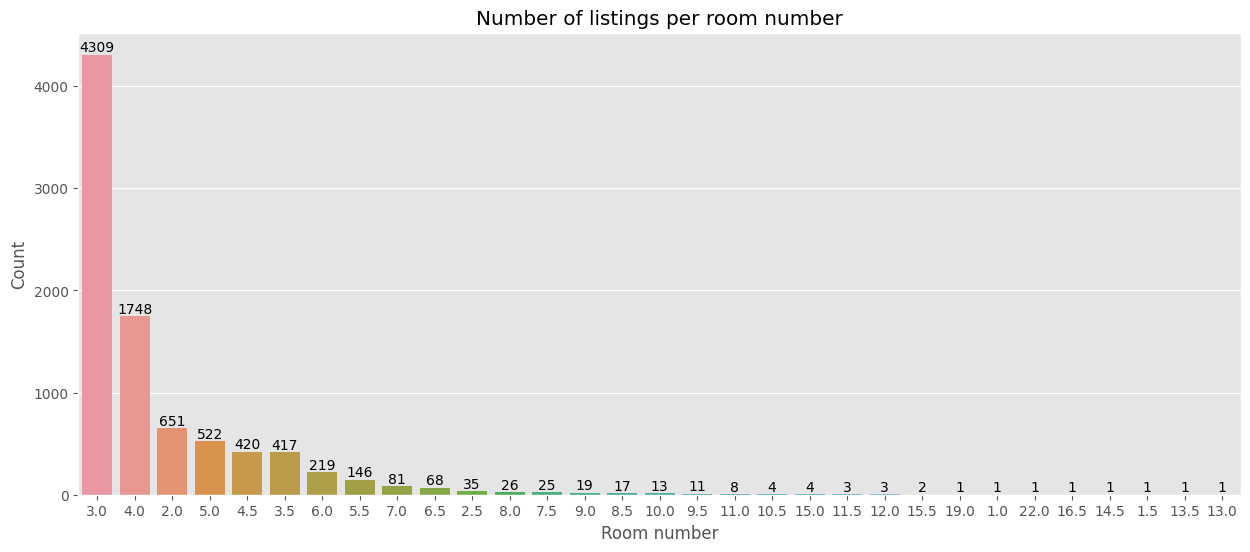

In [22]:
# Plotting 
plt.figure(figsize = (15,6))
ax = sns.countplot(x = 'room_number', 
  order = df_new['room_number'].value_counts().index,
  data = df_new)
for container in ax.containers:
     ax.bar_label(container)
ax.set_title("Number of listings per room number")
plt.xlabel("Room number")
plt.ylabel("Count")

### 7. What is the distribution of listings per host? What are the most listings that a single host has?

In [23]:
df.groupby('host_id')['id'].count().sort_values(ascending=False)

host_id
29927830     156
1621474       75
20104194      74
112527018     65
748818        62
            ... 
134105740      1
134285982      1
134347033      1
134505153      1
428199338      1
Name: id, Length: 4800, dtype: int64

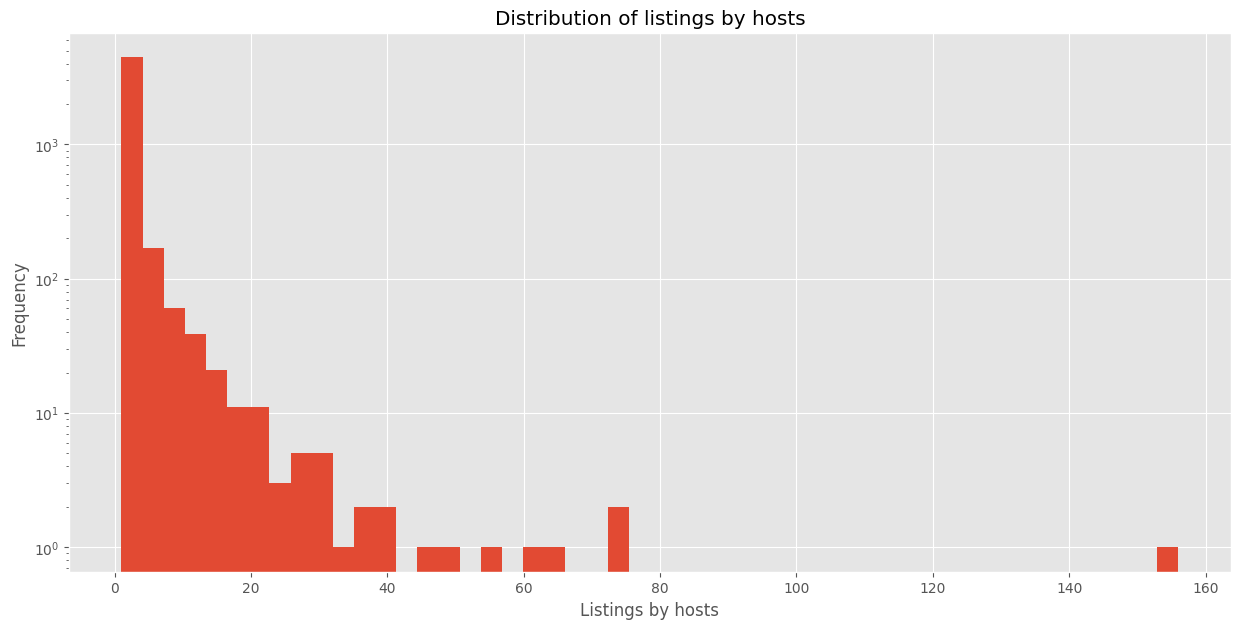

In [24]:
f, ax = plt.subplots(1,1,figsize=(15,7))
ax = df.groupby('host_id')['id'].count().sort_values(ascending=False).plot(kind='hist', bins=50)
ax.set_xlabel("Listings by hosts")
ax.set_title("Distribution of listings by hosts")
plt.yscale("log")
plt.show()

In [25]:
print("Most listings by one host are:", df.groupby('host_id')['id'].count().sort_values(ascending=False).iloc[0])

Most listings by one host are: 156


### 8. When was the first host registered?

In [26]:
unique_host_since = df["host_since"].sort_values().unique()
print("The first host registered in {}.".format(
    unique_host_since[0]))

The first host registered in 2009-09-08.


In [27]:
unique_host_since = df["host_since"].sort_values().unique()
unique_host_since

array(['2009-09-08', '2010-01-15', '2010-04-02', ..., '2021-10-18',
       '2021-10-20', nan], dtype=object)

### 9. What year had the most hosts registered?

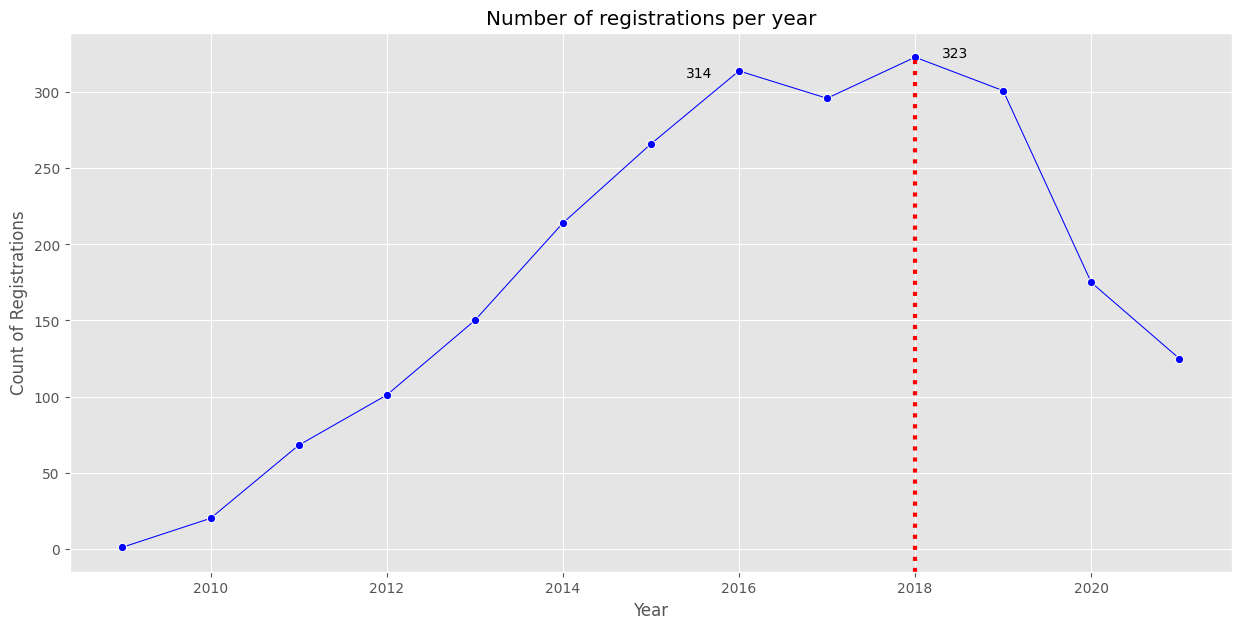

In [28]:
unique_host_since = pd.DatetimeIndex(unique_host_since)
unique_host_since = pd.DatetimeIndex(unique_host_since)
unique_host_since_year = unique_host_since.year.dropna().astype(int)
unique_host_since_year = pd.DataFrame(unique_host_since_year.value_counts(sort=False))
unique_host_since_year = unique_host_since_year.reset_index()
unique_host_since_year = unique_host_since_year.rename({"index":"year",0:"count"},axis=1)

#plot
f, ax4 = plt.subplots(1,1,figsize=(15,7))
ax4= sns.lineplot(x=unique_host_since_year['year'], y=unique_host_since_year['count'], marker="o",
    color="blue",size=2,legend=False)
plt.title("Number of registrations per year")
plt.xlabel("Year")
plt.ylabel("Count of Registrations")
plt.annotate("323",xy=(2018.3,323))
plt.annotate("314",xy= (2015.4,310))
plt.axvline(x = 2018, ymin = 0, ymax = 0.95, color='r',linestyle=":",
        linewidth = 3)
plt.show()

### 10. How many identified hosts are there? What is their percentage over all hosts?

In [29]:
df_identies = df[['host_id', 'host_identity_verified']]
df_identies2 = df_identies.drop_duplicates()
print("They are {} identified hosts.\nThe percentage of identified hosts over all hosts is: {:.2f} %".format(df_identies2['host_identity_verified'].value_counts()[0],
    (df_identies2['host_identity_verified'].value_counts().loc['t'])/len(df_identies2)*100))

They are 2830 identified hosts.
The percentage of identified hosts over all hosts is: 58.96 %


### 11. What are the top-20 most common amenities provided by the hosts?

* In this question we will present 2 ways.

* First way.

In [30]:
top_amenities = Counter(",".join(df["amenities"]).split(",")).most_common(30)
top_amenities.remove(top_amenities[2])
top_amenities = top_amenities[:20]
top_amenities

[(' "Essentials"', 9077),
 (' "Wifi"', 8682),
 (' "Air conditioning"', 8665),
 (' "Hangers"', 8580),
 (' "Iron"', 8246),
 (' "Hair dryer"', 8245),
 ('["Kitchen"', 7920),
 (' "Heating"', 7571),
 (' "Hot water"', 6991),
 (' "Dishes and silverware"', 6794),
 (' "TV"', 6785),
 (' "Cooking basics"', 6703),
 (' "Refrigerator"', 6424),
 (' "Coffee maker"', 6291),
 (' "Dedicated workspace"', 6277),
 (' "Shampoo"]', 6233),
 (' "Bed linens"', 5887),
 (' "Elevator"', 5322),
 (' "Fire extinguisher"', 5204),
 (' "First aid kit"', 5009)]

* We can visualize the most frequent amenities.

C:\Users\maria\AppData\Local\Temp\ipykernel_22936\3760457320.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top_am["amenities"] = top_am["amenities"].str.replace("[","").str.replace("]","").str.replace('"',"")


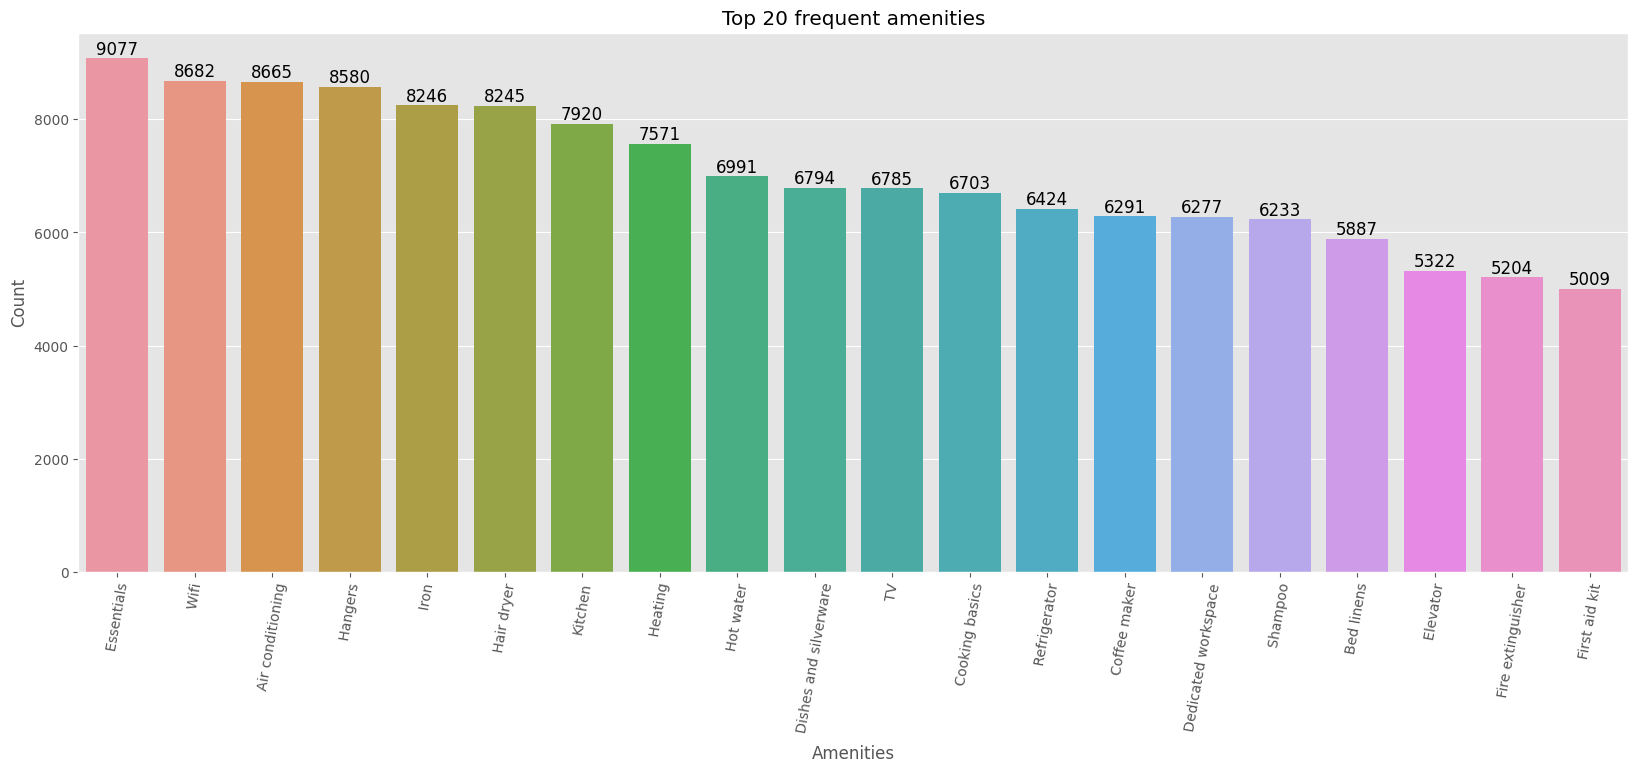

In [31]:
top_amenities_list = []
for i in range(len(top_amenities)):
    top_amenities_list.append(list(top_amenities[i]))
x=[];y=[];j=0
while j <20:
    i=0
    x.append(top_amenities_list[j][i])
    y.append(top_amenities_list[j][i+1])
    j +=1
top_am = pd.DataFrame(x,y)
top_am.reset_index(inplace=True)
top_am = top_am.rename(columns = {"index":"count",0:"amenities"})
top_am["amenities"] = top_am["amenities"].str.replace("[","").str.replace("]","").str.replace('"',"")
top_am
#plot
f, ax = plt.subplots(1,1,figsize=(20,7))
ax = sns.barplot(data=top_am, x= "amenities",y="count")
for container in ax.containers:
    ax.bar_label(container,size=12)
plt.title("Top 20 frequent amenities")
plt.xlabel("Amenities")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

* Second Way.

In [32]:
def clean_sentence(text):
    # Removing apostroph, commas and full stops
    sentence = text.replace("[","")
    sentence = sentence.replace(']',"")
    sentence = sentence.replace('"',"")
    sentence = sentence.replace(', ', ',')
    sentence = sentence.lower()
    
    return sentence

df['amenities_transformed'] = df['amenities'].apply(clean_sentence)
corpora = " ".join(df['amenities_transformed'])
corpora_list = corpora.split(',')
count = Counter(corpora_list)
print(type(count))
pprint(count.most_common(21))

<class 'collections.Counter'>
[('essentials', 9077),
 ('wifi', 8682),
 ('long term stays allowed', 8666),
 ('air conditioning', 8665),
 ('hangers', 8580),
 ('iron', 8246),
 ('hair dryer', 8245),
 ('heating', 7571),
 ('hot water', 6991),
 ('dishes and silverware', 6794),
 ('tv', 6785),
 ('cooking basics', 6703),
 ('refrigerator', 6424),
 ('coffee maker', 6291),
 ('dedicated workspace', 6277),
 ('bed linens', 5887),
 ('elevator', 5322),
 ('fire extinguisher', 5204),
 ('shampoo kitchen', 5153),
 ('first aid kit', 5009),
 ('stove', 4954)]


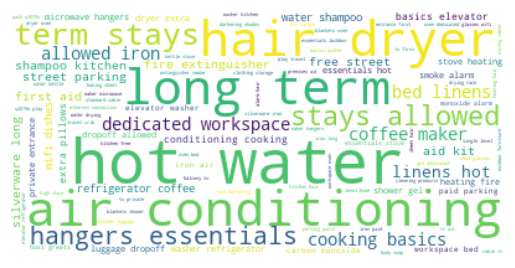

In [33]:
text = corpora
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 12. What is the distribution of price for each room type?

In [8]:
df["price"]=df["price"].str.replace("$","").str.replace(",","").astype(float)

/opt/sagemath-9.3/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


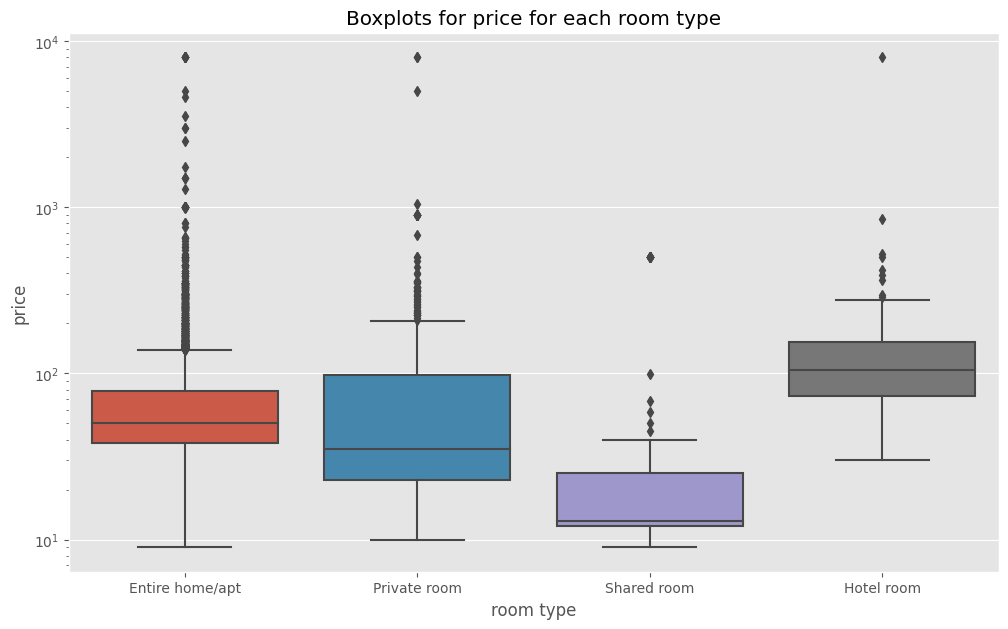

In [35]:
# Boxplots price for each room type
f, ax =plt.subplots(1,1,figsize=(12,7))
ax = sns.boxplot(data=df,x= "room_type",y="price")
ax.set_yscale("log")
plt.title("Boxplots for price for each room type")
plt.xlabel("room type")
plt.show()

In [36]:
df['room_type'].value_counts()

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64

### 13. How many ratings do I have?

In [37]:
#1 way
print("We have {} ratings.".format(
reviews1_data.drop_duplicates().shape[0]+reviews2_data.drop_duplicates().shape[0]+reviews3_data.drop_duplicates().shape[0]+reviews4_data.drop_duplicates().shape[0]))
#2 way
print("We have {} ratings.".format(df["number_of_reviews"].sort_values().sum()))

We have 406607 ratings.
We have 406607 ratings.


### 14. Do all listings have ratings?

In [38]:
# 1 way
no_review = df[df["number_of_reviews"]==0]
print("{} listings don't have a rating or the {} % per all listings.".format(
no_review.shape[0],
round(no_review.shape[0]/len(df["id"])*100,2)))
# 2 way (listings with 0 reviews)
print("{} listings don't have a rating or the  % per all listings.".format((df["number_of_reviews"].sort_values()==0).sum(),
                    round((df["number_of_reviews"].sort_values()==0).sum()/df.shape[0])*100,2))

1708 listings don't have a rating or the 17.83 % per all listings.
1708 listings don't have a rating or the  % per all listings.


### More Exploratory Data Analysis

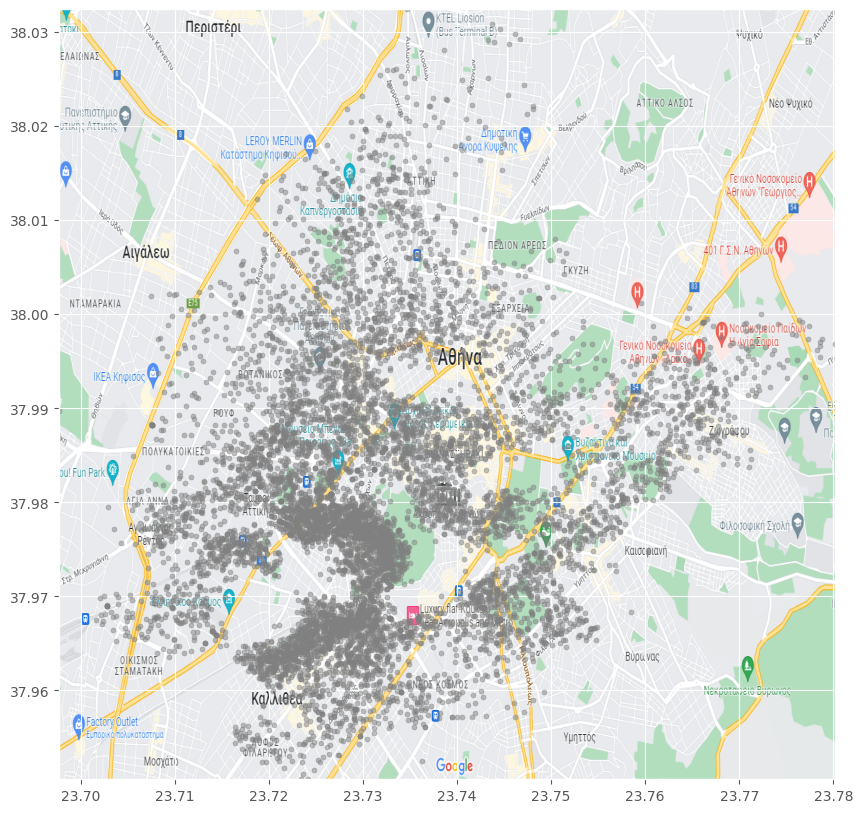

In [39]:
athens_map = plt.imread("athens.map.png")
# Preparing data for visualization (drop outliers from price)
no_outliers_price_df = df[
df["price"] < df["price"].quantile(0.99)]
# We specify the area (coordinates athens - listings)
area = (no_outliers_price_df["longitude"].min(),
        no_outliers_price_df["longitude"].max(),
        no_outliers_price_df["latitude"].min(),
        no_outliers_price_df["latitude"].max())

# Plotting the Athens map with listings 
plt.subplots(1,1,figsize=(15,10))
plt.scatter(x=df["longitude"],y=df["latitude"],s=13, c='gray', alpha=0.5)
plt.imshow(athens_map,zorder = 0, extent = area)

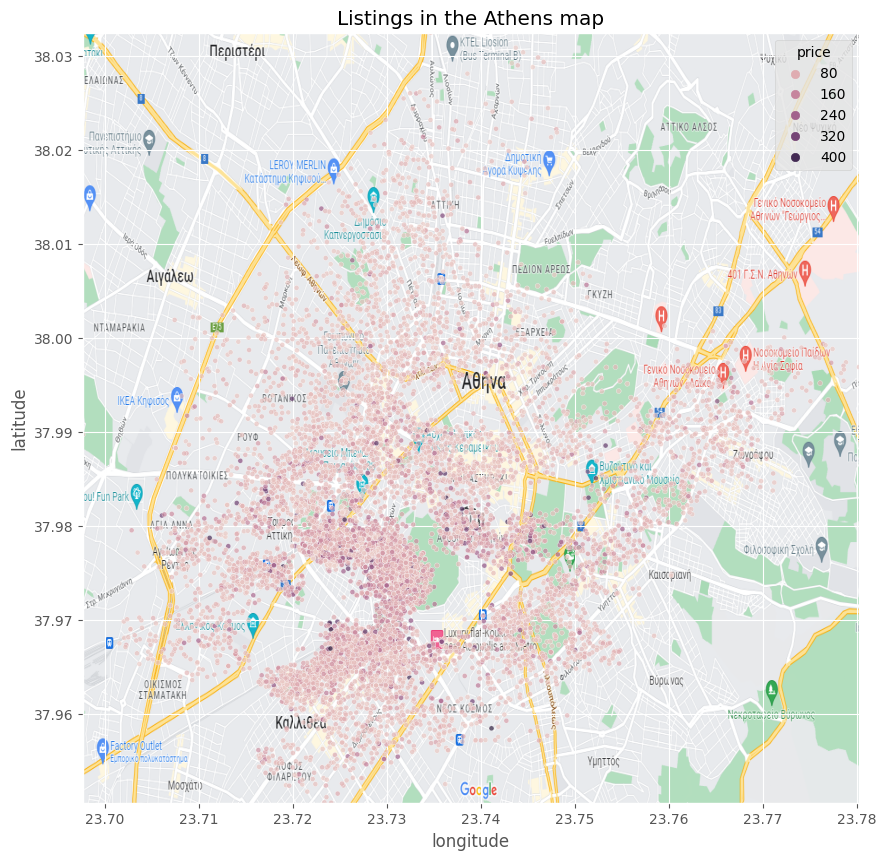

In [40]:
# Plotting the Athens map with listings per price.
f, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.scatterplot(x="longitude",y="latitude",data = no_outliers_price_df,
                   hue = "price",alpha=0.7,s=13)
plt.title("Listings in the Athens map")
plt.imshow(athens_map,zorder=0,extent=area)

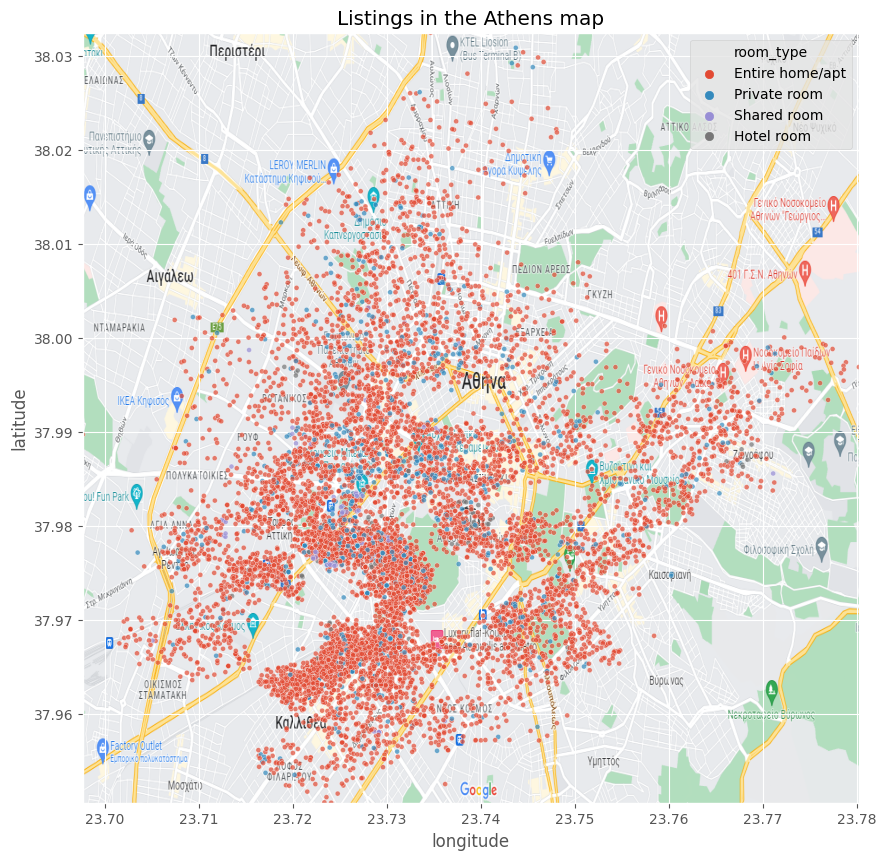

In [41]:
# Plotting the Athens map listings per room types.
f, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.scatterplot(x="longitude",y="latitude",data = no_outliers_price_df,
                   hue = "room_type",alpha=0.7,s=13)
plt.title("Listings in the Athens map")
plt.imshow(athens_map,zorder=0,extent=area)

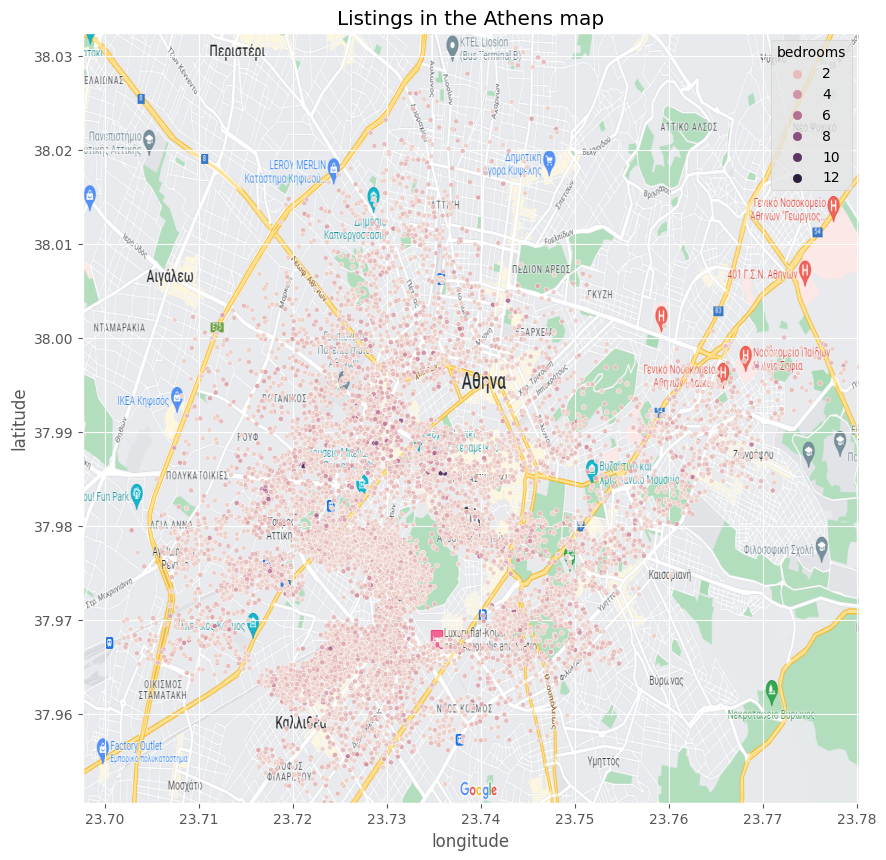

In [42]:
# Plotting the Athens map listings per bedrooms.
f, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.scatterplot(x="longitude",y="latitude",data = no_outliers_price_df,
                   hue = "bedrooms",alpha=1,s=13)
plt.title("Listings in the Athens map")
plt.imshow(athens_map,zorder=0,extent=area)

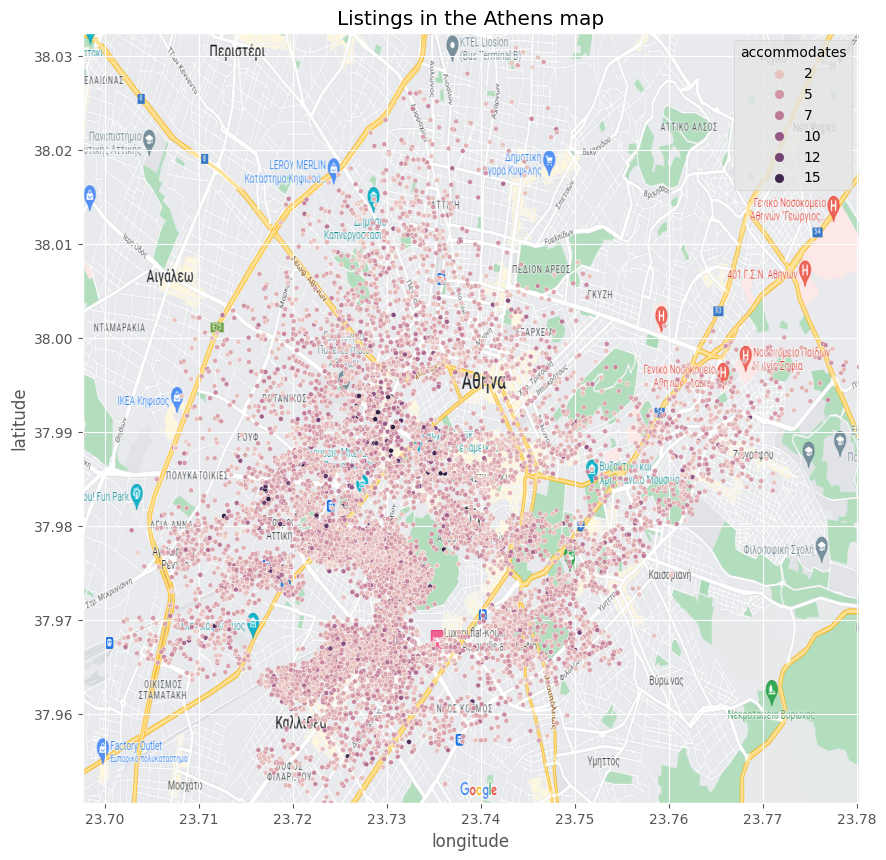

In [43]:
# Plotting the Athens map listings per accommodates.
f, ax = plt.subplots(1,1,figsize=(15,10))
ax = sns.scatterplot(x="longitude",y="latitude",data = no_outliers_price_df,
                   hue = "accommodates",s=13,alpha=1)
plt.title("Listings in the Athens map")
plt.imshow(athens_map,zorder=0,extent=area)

* How many listings per number of accommodates are there?

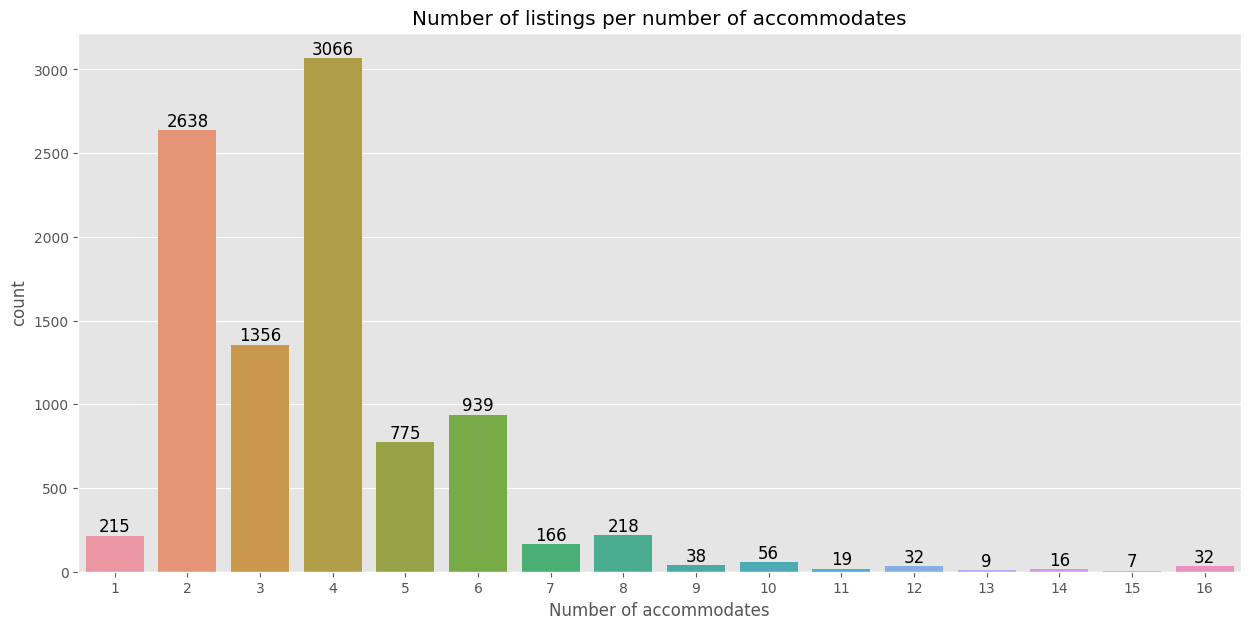

In [44]:
f, ax = plt.subplots(1,1,figsize=(15,7))
ax = sns.countplot(x="accommodates",data=df)
for container in ax.containers:
    ax.bar_label(container,size=12)
plt.title("Number of listings per number of accommodates")
plt.xlabel("Number of accommodates")
plt.show()

Median price for each neighbourhoud.

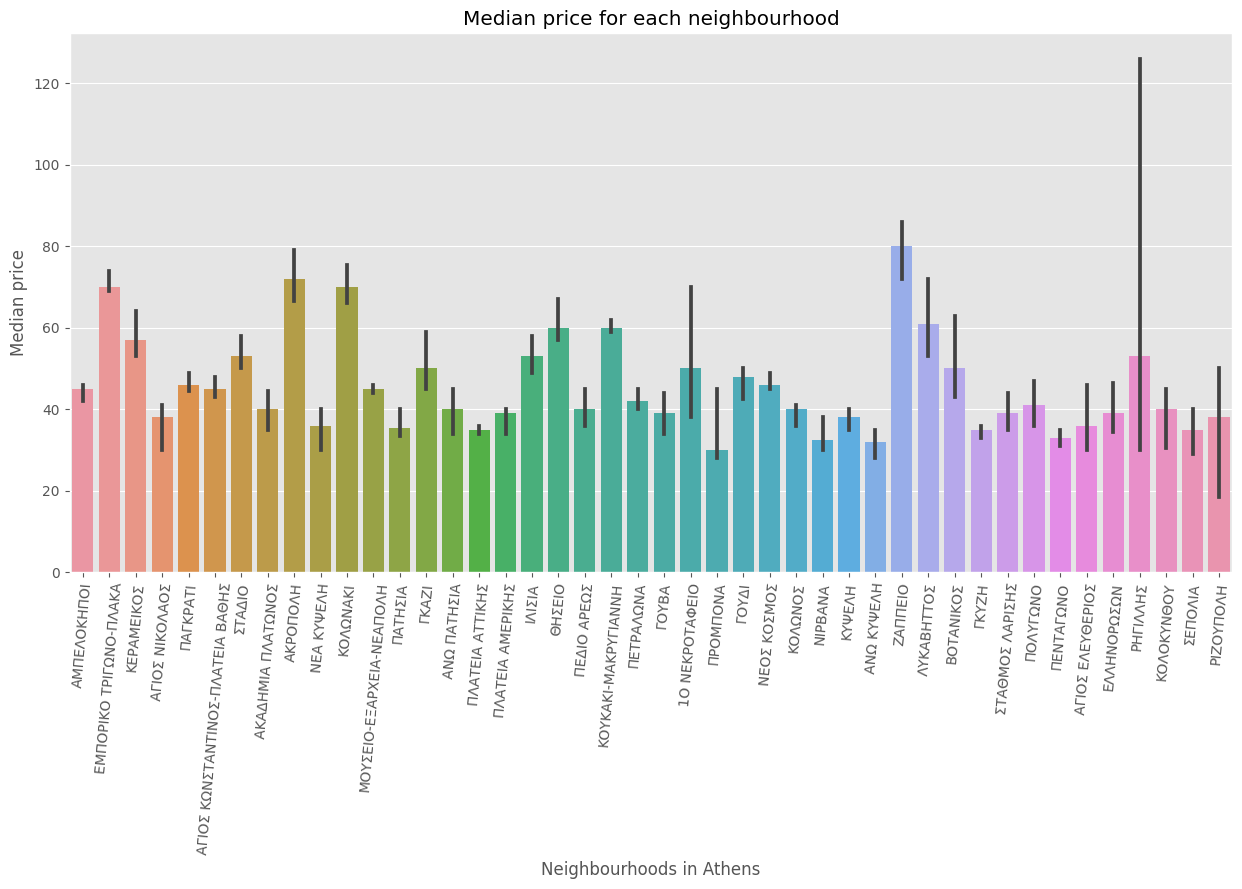

In [45]:
# Plotting median price - neighbourhood-cleansed
f, ax = plt.subplots(1,1,figsize=(15,7))
ax = sns.barplot(x="neighbourhood_cleansed",y="price",
                 data=no_outliers_price_df,estimator=np.median)
plt.title("Median price for each neighbourhood")
plt.ylabel("Median price")
plt.xlabel("Neighbourhoods in Athens")
plt.xticks(rotation=85)
plt.show()

In [46]:
# Mean, std, min, max price for each neighbourhood.
round(no_outliers_price_df.groupby("neighbourhood_cleansed")["price"].describe()[["mean","std","min","max","count"]],2)

mean    std   min    max   count
neighbourhood_cleansed                                              
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                     74.45  57.85  25.0  212.0    33.0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                   40.11  15.10  20.0   75.0    19.0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   62.02  55.55  11.0  411.0   596.0
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                     43.61  31.30  15.0  248.0    69.0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                  52.33  42.68  18.0  286.0    60.0
ΑΚΡΟΠΟΛΗ                           92.05  69.11  12.0  435.0   312.0
ΑΜΠΕΛΟΚΗΠΟΙ                        53.10  35.31  18.0  350.0   328.0
ΑΝΩ ΚΥΨΕΛΗ                         36.76  25.00  10.0  187.0    71.0
ΑΝΩ ΠΑΤΗΣΙΑ                        46.26  25.88  15.0  150.0    58.0
ΒΟΤΑΝΙΚΟΣ                          71.24  53.61  26.0  329.0    59.0
ΓΚΑΖΙ                              65.23  62.68  10.0  393.0    69.0
ΓΚΥΖΗ                              39.72  19.31  13.0  120.0    87.0
ΓΟΥΒΑ                              56.51  68.90  20.0  440.0    53.0
ΓΟΥΔΙ                              53.55  29.27  17.0  200.0   162.0
ΕΛΛΗΝΟΡΩΣΩΝ                        45.67  23.62  14.0  109.0    42.0
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             84.44  54.63   9.0  398.0  1849.0
ΖΑΠΠΕΙΟ                           103.78  78.23  25.0  385.0   140.0
ΘΗΣΕΙΟ                             79.25  59.17  10.0  413.0   291.0
ΙΛΙΣΙΑ                             64.60  40.19  16.0  253.0   171.0
ΚΕΡΑΜΕΙΚΟΣ                         75.10  54.25  12.0  333.0   229.0
ΚΟΛΟΚΥΝΘΟΥ                         37.78   8.15  24.0   49.0    18.0
ΚΟΛΩΝΑΚΙ                           91.52  64.25  20.0  439.0   326.0
ΚΟΛΩΝΟΣ                            42.78  21.35  14.0  150.0    82.0
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                71.94  45.74  15.0  403.0   838.0
ΚΥΨΕΛΗ                             48.04  35.73  12.0  262.0   200.0
ΛΥΚΑΒΗΤΤΟΣ                         82.34  70.33  12.0  400.0   116.0
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ           56.75  48.45   9.0  400.0   693.0
ΝΕΑ ΚΥΨΕΛΗ                         39.98  22.65  11.0  150.0    51.0
ΝΕΟΣ ΚΟΣΜΟΣ                        57.20  39.19  13.0  400.0   707.0
ΝΙΡΒΑΝΑ                            44.91  38.63  12.0  250.0   104.0
ΠΑΓΚΡΑΤΙ                           53.88  37.37  11.0  322.0   380.0
ΠΑΤΗΣΙΑ                            42.88  34.27  13.0  300.0   116.0
ΠΕΔΙΟ ΑΡΕΩΣ                        53.48  37.96  12.0  250.0    77.0
ΠΕΝΤΑΓΩΝΟ                          33.00   2.83  31.0   35.0     2.0
ΠΕΤΡΑΛΩΝΑ                          49.86  31.99  10.0  240.0   210.0
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                   41.19  18.17  10.0  100.0   115.0
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                    41.85  26.71  13.0  250.0   381.0
ΠΟΛΥΓΩΝΟ                           43.12  18.60  17.0  100.0    24.0
ΠΡΟΜΠΟΝΑ                           39.33  24.28  18.0  100.0     9.0
ΡΗΓΙΛΛΗΣ                           69.67  50.12  30.0  126.0     3.0
ΡΙΖΟΥΠΟΛΗ                          35.30  15.78  13.0   57.0    10.0
ΣΕΠΟΛΙΑ                            36.63  13.19  15.0   71.0    27.0
ΣΤΑΔΙΟ                             69.36  50.77  15.0  330.0   220.0
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                    47.86  42.68  10.0  350.0    79.0